In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from s3fs import S3FileSystem, S3Map

import cmocean as cm

/opt/tljh/user/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
plt.rcParams['font.size']=14
plt.rcParams['axes.labelsize']='large'
plt.rcParams['pcolor.shading']='auto'


In [22]:
%matplotlib notebook

In [19]:
from utils import filt_decompose

def load_6min(ncfile):
    ds = xr.open_dataset(ncfile)

    ds_1Hz = ds.isel(time=slice(None,None,16)).sel(time=slice('2023-04-22 00:00:00','2023-06-01 00:00:00'))
    ds_360s = ds_1Hz['BPR_Pressure'].resample(time='360s').mean()
    
    time = ds_360s.time.values
    dt = (time[1:]-time[:-1]).mean()
    dtsec = dt.astype(float)*1e-9
    
    ypr = ds_360s - ds_360s.mean()
    y = filt_decompose(ypr, dtsec)

    return xr.DataArray(y[:,1], coords={'time':time})

In [20]:
sitename = 'L245'
ncfile = '../DATA/FV01/RBRqu/[BB23]_[BB23_REC]_[L245]_[33]_[RBRquartz TP]_[213897]_[no_outfile_append].nc'
da_L245 = load_6min(ncfile)

sitename = 'W310'
ncfile = '../DATA/FV01/RBRqu/[BB23]_[BB23_REC]_[W310]_[48]_[RBRquartz TP]_[213895]_[no_outfile_append].nc'
da_W310 = load_6min(ncfile)

In [28]:
da_mean = 0.5*(da_L245+da_W310)

<IPython.core.display.Javascript object>


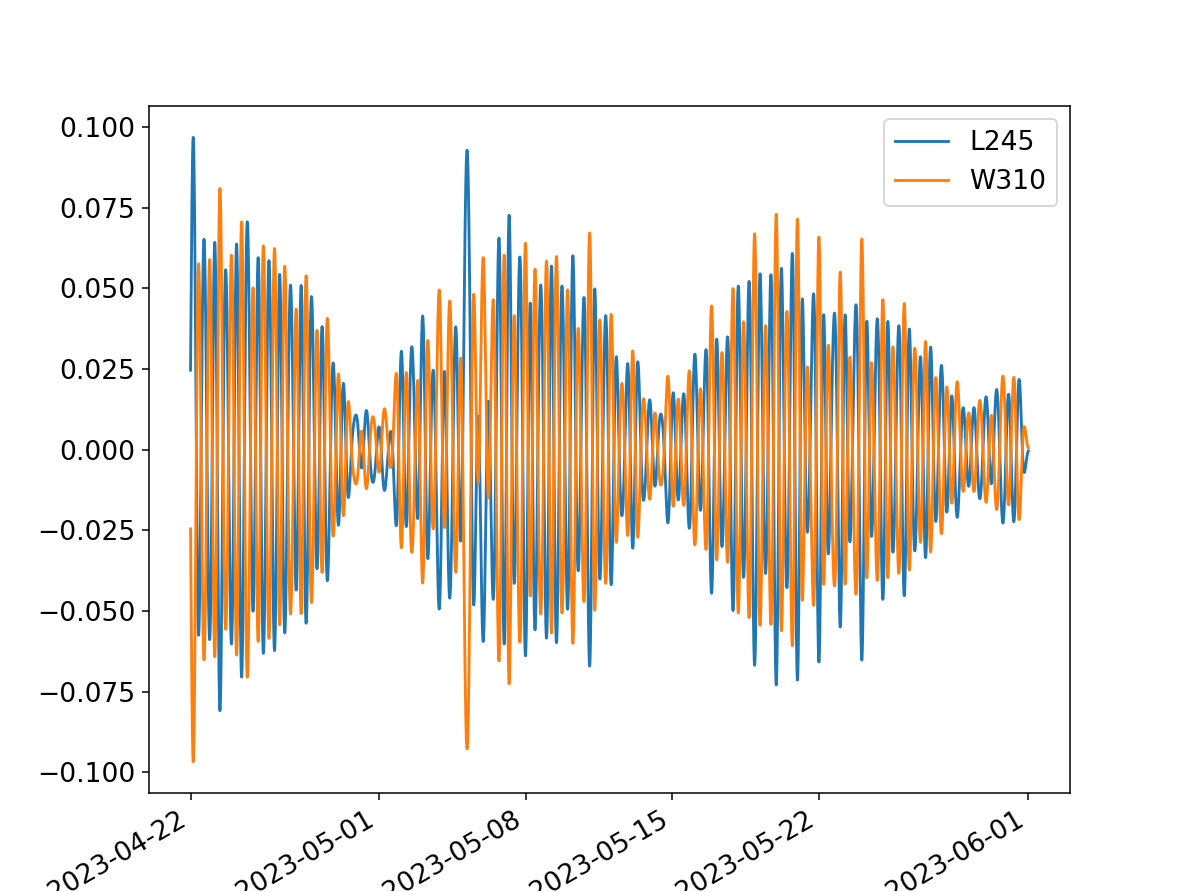

In [30]:
plt.figure()

(da_L245-da_mean).plot()
(da_W310-da_mean).plot()
plt.legend(('L245','W310'))